<div align="center"><h1> <font color='cyan'>Assignment 2 - Building Neural Networks and CNNs</font>

<h3>Checkpoint: October 24, Thu, 11:59pm</h3>
<h2><font color='red'>Due Date: November 7, Thu, 11:59pm</h2></font> 
</div>


Welcome to our second assignment. This assignment focuses on building fully connected neural networks (NN) and convolutional neural networks (CNN). It consists of four parts where you practice dealing with various datasets and implement, train, and adjust neural networks.<br/>
The first part consists of performing data analysis and building a basic NN. In the second part, we learn how to optimize and improve your NN using various techniques. In the third part, we will implement a basic CNN and apply optimization and in part 4 we will implement the VGG-11 model. There is also a bonus task focusing on implementing more complex architecture.

<h2><font color='green'>Part I: Building a Basic NN [30 points]</font></h2>

In this part, you will implement a neural network using the PyTorch framework. You will train the network on the provided dataset, which consists of seven features and a binary target variable. Your objective is to accurately predict a target based on the input features.

<h2>DATASETS:</h2>
    It is provided on UBlearns > Assignments.
<h2>Step 1: Loading the Dataset and main statistics</h2>

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, roc_auc_score
import time

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [4]:
for column in df:
    print(column,': ', df[str(column)].unique())

f1 :  ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
f2 :  ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
f3 :  [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  

In [5]:
for column in df:
    df[str(column)] = pd.to_numeric(df[str(column)], downcast= 'float', errors= 'coerce')

In [6]:
for column in df:
    print(column,': ', df[str(column)].unique())

f1 :  [ 6.  1.  8.  0.  5.  3. 10.  2.  4.  7.  9. 11. 13. 15. 17. 12. 14. nan]
f2 :  [148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 126.  99. 196. 119. 143. 147.  97. 145. 117.
 109. 158.  88.  92. 122. 138. 102.  90. 111. 180. 133. 106. 171. 159.
 146.  71. 105. 101. 176. 150.  73. 187.  84.  44. 141. 114.  95. 129.
  79.   0.  62. 131. 112. 113.  74.  83. 136.  80. 123.  81. 134. 142.
 144.  93. 163. 151.  96. 155.  76. 160. 124. 162. 132. 120. 173. 170.
 128. 108. 154.  57. 156. 153. 188. 152. 104.  87.  75. 179. 130. 194.
 181. 135. 184. 140. 177. 164.  91. 165.  86. 193. 191. 161. 167.  77.
 182. 157. 178.  61.  98. 127.  82.  72. 172.  94. 175. 195.  68. 186.
 198. 121.  67. 174. 199.  56. 169. 149.  65. 190.  nan]
f3 :  [ 72.  66.  64.  40.  74.  50.   0.  70.  96.  92.  80.  60.  84.  30.
  88.  90.  94.  76.  82.  75.  58.  78.  68. 110.  56.  62.  85.  86.
  48.  44.  65. 108.  55. 122.  54.  52.  98. 104.  95.  46. 102. 100.

In [7]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,765.000000,765.000000,766.000000,765.000000,765.000000,765.000000,765.000000,766.000000
mean,3.849673,120.909805,69.118797,20.542484,80.091507,31.998173,0.472128,0.349869
std,3.373696,31.947945,19.376902,15.960515,115.374382,7.898275,0.331545,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.299999,0.244000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.599998,0.626000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,1.000000


In [8]:
df.isnull().sum()

f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [9]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [10]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [11]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,1.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,0.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,1.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,0.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,1.0


Correlation matrix               f1        f2        f3        f4        f5        f6        f7  \
f1      1.000000  0.125133  0.140990 -0.082371 -0.075434  0.017205 -0.031183   
f2      0.125133  1.000000  0.151813  0.057729  0.332425  0.217905  0.137664   
f3      0.140990  0.151813  1.000000  0.207140  0.088694  0.281532  0.041543   
f4     -0.082371  0.057729  0.207140  1.000000  0.437818  0.392922  0.182141   
f5     -0.075434  0.332425  0.088694  0.437818  1.000000  0.197967  0.184416   
f6      0.017205  0.217905  0.281532  0.392922  0.197967  1.000000  0.139827   
f7     -0.031183  0.137664  0.041543  0.182141  0.184416  0.139827  1.000000   
target  0.221211  0.463623  0.064623  0.078163  0.128889  0.292430  0.173636   

          target  
f1      0.221211  
f2      0.463623  
f3      0.064623  
f4      0.078163  
f5      0.128889  
f6      0.292430  
f7      0.173636  
target  1.000000  


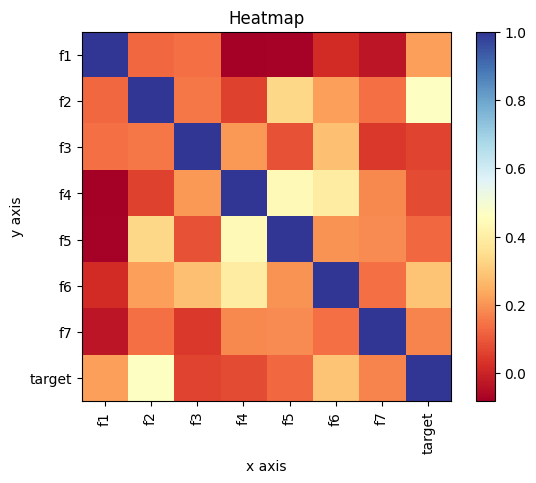

In [12]:
df_correlation_matrix = df.corr()
print("Correlation matrix",df_correlation_matrix)

plt.imshow(df_correlation_matrix, cmap='RdYlBu', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)
plt.yticks(np.arange(len(df.columns)), df.columns)
plt.show()

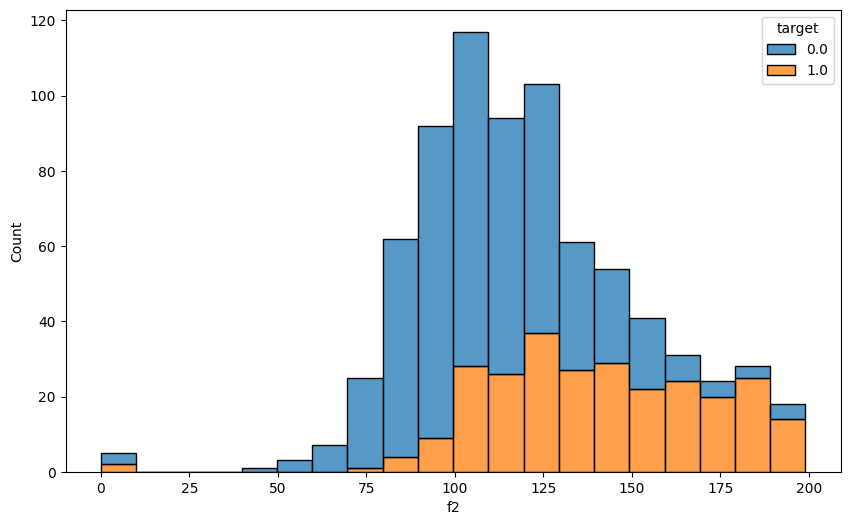

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="f2", hue="target", multiple="stack", kde=False, bins=20)
plt.show()

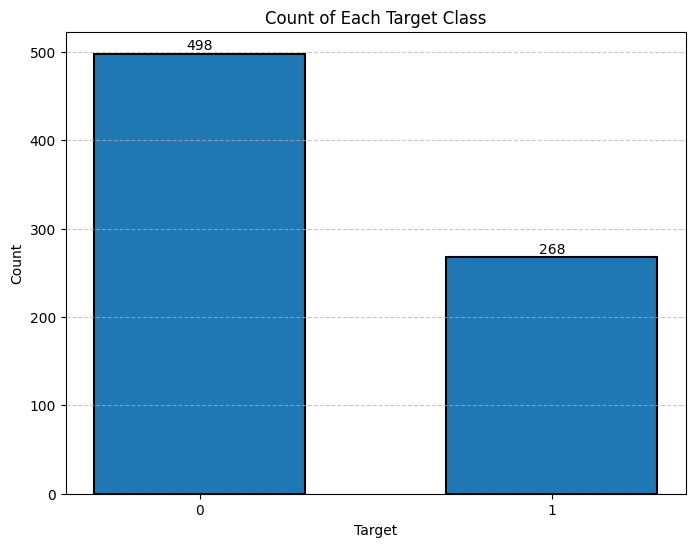

In [14]:
target_count = df.groupby("target")["target"].count()
plt.figure(figsize=(8, 6))
bars = plt.bar(target_count.index, target_count.values, edgecolor='black',linewidth=1.5,width=0.6)
plt.title('Count of Each Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
plt.show()

In [15]:
print(df.head())
scaler = StandardScaler()
columns_to_scale = df.drop(columns=['target']).columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df.head())

    f1     f2    f3    f4     f5         f6     f7  target
0  6.0  148.0  72.0  35.0    0.0  33.599998  0.627     1.0
1  1.0   85.0  66.0  29.0    0.0  26.600000  0.351     0.0
2  8.0  183.0  64.0   0.0    0.0  23.299999  0.672     1.0
3  1.0   89.0  66.0  23.0   94.0  28.100000  0.167     0.0
4  0.0  137.0  40.0  35.0  168.0  43.099998  2.288     1.0
         f1        f2        f3        f4        f5        f6        f7  \
0  0.638214  0.849057  0.148790  0.907015 -0.695096  0.203073  0.467733   
1 -0.845779 -1.125480 -0.161060  0.530596 -0.695096 -0.684356 -0.365823   
2  1.231811  1.946022 -0.264343 -1.288765 -0.695096 -1.102715  0.603639   
3 -0.845779 -1.000113 -0.161060  0.154176  0.120709 -0.494193 -0.921527   
4 -1.142578  0.504297 -1.503740  0.907015  0.762938  1.407440  5.484172   

   target  
0     1.0  
1     0.0  
2     1.0  
3     0.0  
4     1.0  


In [16]:
X = df.drop("target", axis=1)
Y = df.target
print(Y.head())

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: target, dtype: float32


In [17]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.1, random_state=42)

In [18]:
X_train, X_val, Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.11, random_state=42)

In [19]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_val:", X_val.shape)
print("Y_val:", Y_val.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (613, 7)
Y_train: (613,)
X_val: (76, 7)
Y_val: (76,)
X_test: (77, 7)
Y_test: (77,)


In [20]:
X_train = torch.from_numpy(X_train.values)
Y_train = torch.from_numpy(Y_train.values)
X_test = torch.from_numpy(X_test.values)
Y_test = torch.from_numpy(Y_test.values)
X_val = torch.from_numpy(X_val.values)
Y_val = torch.from_numpy(Y_val.values)

In [21]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

summary(model, input_size=(1, 7))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleNN                                 [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   512
├─ReLU: 1-2                              [1, 64]                   --
├─Dropout: 1-3                           [1, 64]                   --
├─Linear: 1-4                            [1, 64]                   4,160
├─ReLU: 1-5                              [1, 64]                   --
├─Linear: 1-6                            [1, 1]                    65
├─Sigmoid: 1-7                           [1, 1]                    --
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

In [22]:
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)
    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()
            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)
    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val)
    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'jagritsh_pgnanase_assignment2_part1.pt')
end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

Epoch 1/50 | Training Loss: 0.6776 | Validation Loss: 0.6320 | Training Accuracy: 0.6248 | Validation Accuracy: 0.7368
Epoch 2/50 | Training Loss: 0.6249 | Validation Loss: 0.5724 | Training Accuracy: 0.6998 | Validation Accuracy: 0.7895
Epoch 3/50 | Training Loss: 0.5765 | Validation Loss: 0.5251 | Training Accuracy: 0.7162 | Validation Accuracy: 0.7895
Epoch 4/50 | Training Loss: 0.5380 | Validation Loss: 0.5046 | Training Accuracy: 0.7471 | Validation Accuracy: 0.7763
Epoch 5/50 | Training Loss: 0.5151 | Validation Loss: 0.5024 | Training Accuracy: 0.7504 | Validation Accuracy: 0.7763
Epoch 6/50 | Training Loss: 0.5220 | Validation Loss: 0.4973 | Training Accuracy: 0.7586 | Validation Accuracy: 0.7895
Epoch 7/50 | Training Loss: 0.4882 | Validation Loss: 0.5008 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4807 | Validation Loss: 0.5023 | Training Accuracy: 0.7602 | Validation Accuracy: 0.7632
Epoch 9/50 | Training Loss: 0.4914 | Validation 

In [24]:
print(training_losses)
print(validation_losses)

model.eval()

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)

test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

[0.6775753378868103, 0.624932000041008, 0.5765495359897613, 0.5379542037844658, 0.5150585055351258, 0.5220066294074058, 0.4882228270173073, 0.4806768804788589, 0.49138080030679704, 0.48422608971595765, 0.4896374255418777, 0.4741173967719078, 0.47246685773134234, 0.46821879893541335, 0.47524817287921906, 0.4764240957796574, 0.46949895173311235, 0.4717960312962532, 0.47244490012526513, 0.4780721053481102, 0.4635495752096176, 0.45196918994188306, 0.47707989513874055, 0.4610056012868881, 0.48449111729860306, 0.45657148510217666, 0.46095290780067444, 0.4423957705497742, 0.462018820643425, 0.46368506699800494, 0.47122393548488617, 0.4560555338859558, 0.43627591878175737, 0.4646593749523163, 0.4531652145087719, 0.45626208633184434, 0.4591967612504959, 0.4477559804916382, 0.45159058570861815, 0.4417922616004944, 0.48729859814047816, 0.4768278166651726, 0.4453833594918251, 0.4609283238649368, 0.45010472387075423, 0.4398301675915718, 0.4556972771883011, 0.4669431120157242, 0.4409299649298191, 0.

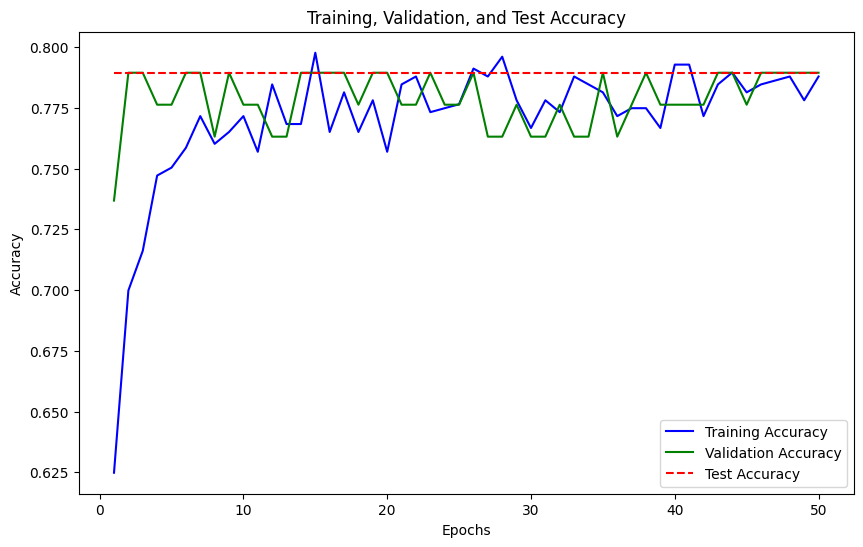

In [25]:
test_accuracy_repeated = [accuracy] * num_epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

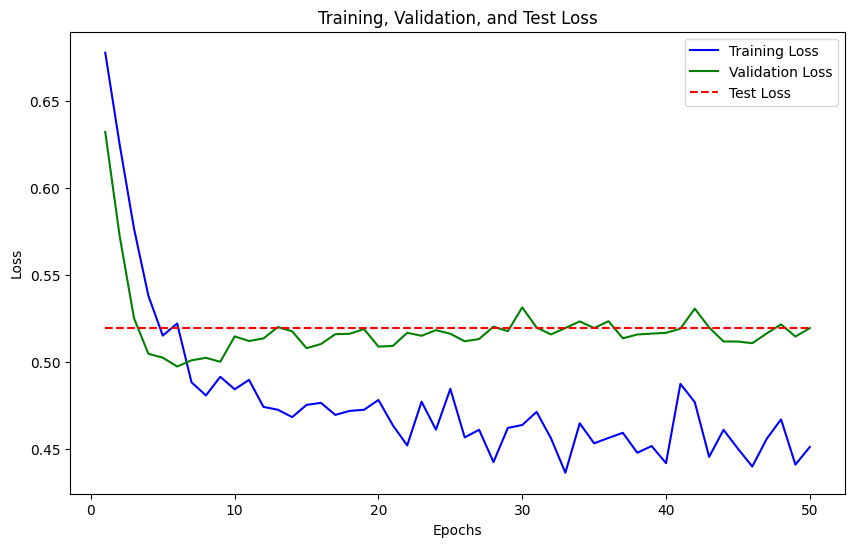

In [26]:
test_loss_repeated = [test_loss] * num_epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss', color='green')
plt.plot(range(1, num_epochs + 1), test_loss_repeated, label='Test Loss', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

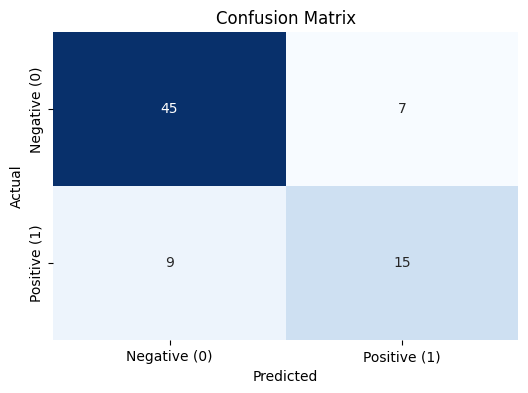

In [27]:
conf_matrix = confusion_matrix(Y_val, test_outputs)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

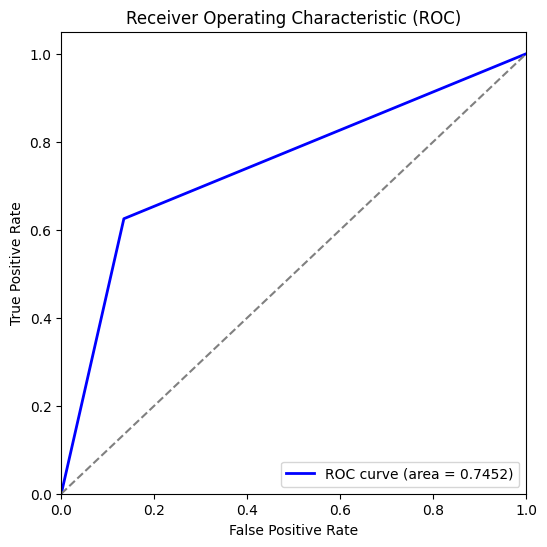

In [28]:
fpr, tpr, thresholds = roc_curve(Y_val, test_outputs)
roc_auc = roc_auc_score(Y_val, test_outputs)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

<h2><font color='green'>Part II: Optimizing NN [20 points]</font></h2>

In [29]:
# model1 drop=0.1

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.1)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()


loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval()

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)

test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6474 | Validation Loss: 0.5953 | Training Accuracy: 0.6852 | Validation Accuracy: 0.7763
Epoch 2/50 | Training Loss: 0.5744 | Validation Loss: 0.5326 | Training Accuracy: 0.7374 | Validation Accuracy: 0.7895
Epoch 3/50 | Training Loss: 0.5089 | Validation Loss: 0.4929 | Training Accuracy: 0.7635 | Validation Accuracy: 0.8289
Epoch 4/50 | Training Loss: 0.4847 | Validation Loss: 0.4940 | Training Accuracy: 0.7635 | Validation Accuracy: 0.7895
Epoch 5/50 | Training Loss: 0.4646 | Validation Loss: 0.4945 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4533 | Validation Loss: 0.5009 | Training Accuracy: 0.7798 | Validation Accuracy: 0.7895
Epoch 7/50 | Training Loss: 0.4643 | Validation Loss: 0.5048 | Training Accuracy: 0.7879 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4729 | Validation Loss: 0.5084 | Training Accuracy: 0.7781 | Validation Accuracy: 0.7895
Epoch 9/50 | Training Loss: 0.4499 | Validation 

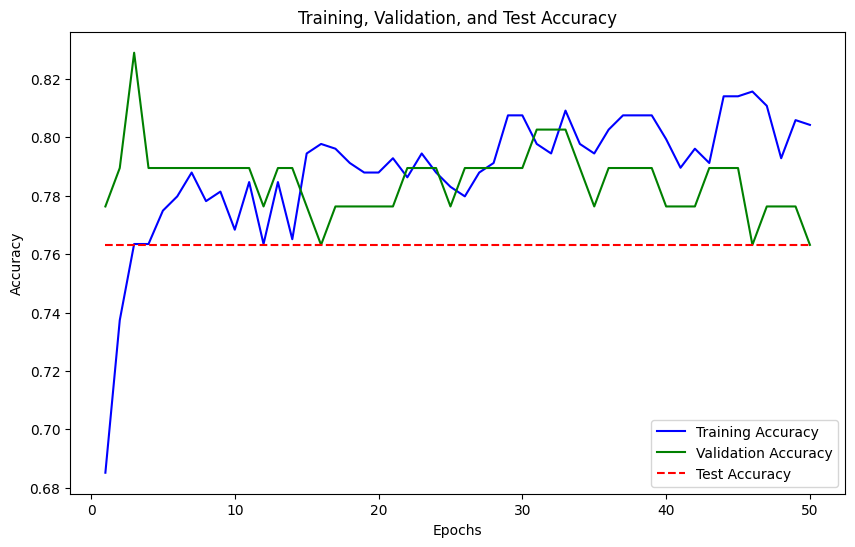

In [30]:
test_accuracy_repeated = [accuracy] * num_epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [31]:
# model1 drop=0.3

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)
    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()
            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)
    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val)
    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        
end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval()
test_loss = 0
correct_test = 0
total_test = 0
with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)
test_loss = validation_losses[-1]
accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6633 | Validation Loss: 0.6326 | Training Accuracy: 0.6493 | Validation Accuracy: 0.7237
Epoch 2/50 | Training Loss: 0.5952 | Validation Loss: 0.5575 | Training Accuracy: 0.7129 | Validation Accuracy: 0.7895
Epoch 3/50 | Training Loss: 0.5345 | Validation Loss: 0.5116 | Training Accuracy: 0.7667 | Validation Accuracy: 0.7763
Epoch 4/50 | Training Loss: 0.5017 | Validation Loss: 0.4991 | Training Accuracy: 0.7684 | Validation Accuracy: 0.7895
Epoch 5/50 | Training Loss: 0.4765 | Validation Loss: 0.5052 | Training Accuracy: 0.7651 | Validation Accuracy: 0.7763
Epoch 6/50 | Training Loss: 0.4768 | Validation Loss: 0.5110 | Training Accuracy: 0.7618 | Validation Accuracy: 0.7895
Epoch 7/50 | Training Loss: 0.4484 | Validation Loss: 0.5137 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4714 | Validation Loss: 0.4984 | Training Accuracy: 0.7667 | Validation Accuracy: 0.7895
Epoch 9/50 | Training Loss: 0.4755 | Validation 

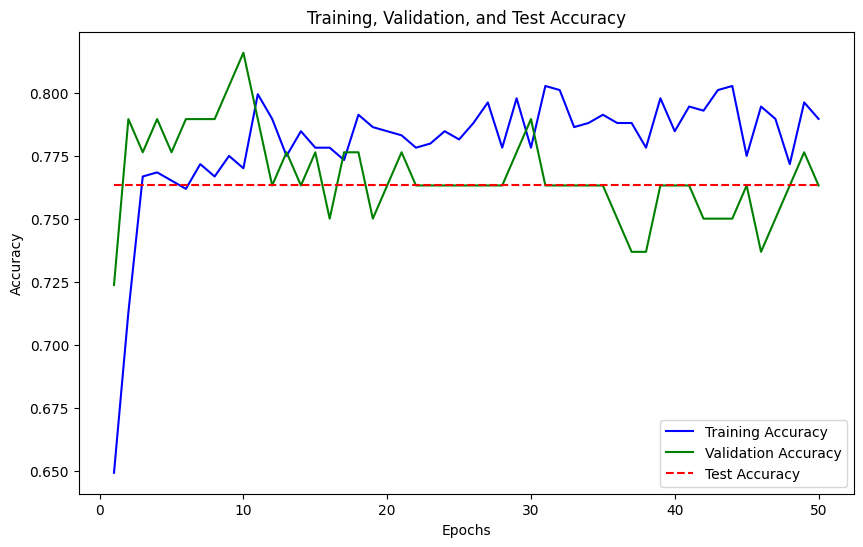

In [32]:
test_accuracy_repeated = [accuracy] * num_epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [33]:
# model1 drop=0.6

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.6)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 

        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval()

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)
test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6814 | Validation Loss: 0.6272 | Training Accuracy: 0.5449 | Validation Accuracy: 0.7763
Epoch 2/50 | Training Loss: 0.6145 | Validation Loss: 0.5576 | Training Accuracy: 0.6998 | Validation Accuracy: 0.8026
Epoch 3/50 | Training Loss: 0.5693 | Validation Loss: 0.5188 | Training Accuracy: 0.6949 | Validation Accuracy: 0.8026
Epoch 4/50 | Training Loss: 0.5642 | Validation Loss: 0.4905 | Training Accuracy: 0.7325 | Validation Accuracy: 0.8289
Epoch 5/50 | Training Loss: 0.5295 | Validation Loss: 0.4878 | Training Accuracy: 0.7423 | Validation Accuracy: 0.8158
Epoch 6/50 | Training Loss: 0.5341 | Validation Loss: 0.4834 | Training Accuracy: 0.7308 | Validation Accuracy: 0.8158
Epoch 7/50 | Training Loss: 0.4993 | Validation Loss: 0.4836 | Training Accuracy: 0.7602 | Validation Accuracy: 0.8158
Epoch 8/50 | Training Loss: 0.4781 | Validation Loss: 0.4799 | Training Accuracy: 0.7732 | Validation Accuracy: 0.8158
Epoch 9/50 | Training Loss: 0.4946 | Validation 

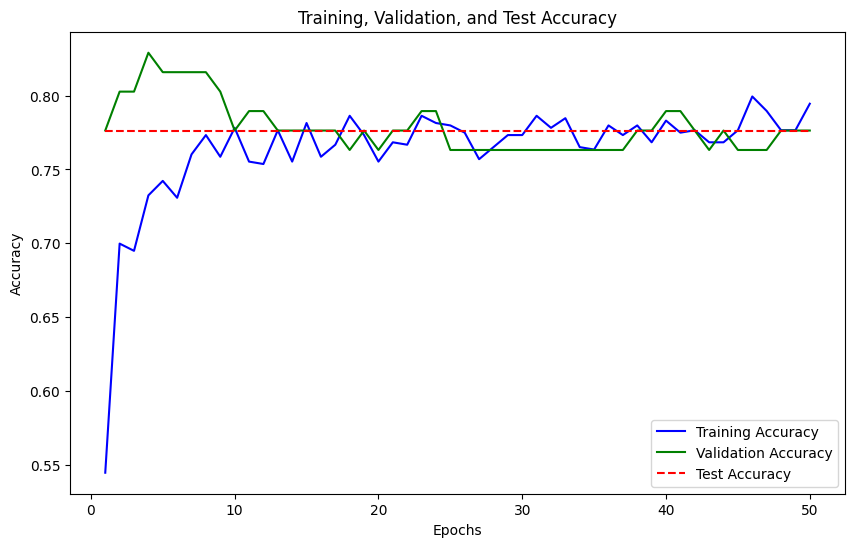

In [34]:
test_accuracy_repeated = [accuracy] * num_epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [35]:
# model4  hidden layer= 1
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU() 
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):    
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze() 
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()     
        optimizer.step()      

        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)  

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval() 

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  
test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6566 | Validation Loss: 0.6176 | Training Accuracy: 0.6297 | Validation Accuracy: 0.7632
Epoch 2/50 | Training Loss: 0.6076 | Validation Loss: 0.5862 | Training Accuracy: 0.7259 | Validation Accuracy: 0.7500
Epoch 3/50 | Training Loss: 0.5928 | Validation Loss: 0.5632 | Training Accuracy: 0.6982 | Validation Accuracy: 0.8158
Epoch 4/50 | Training Loss: 0.5641 | Validation Loss: 0.5462 | Training Accuracy: 0.7374 | Validation Accuracy: 0.8158
Epoch 5/50 | Training Loss: 0.5486 | Validation Loss: 0.5337 | Training Accuracy: 0.7325 | Validation Accuracy: 0.8026
Epoch 6/50 | Training Loss: 0.5364 | Validation Loss: 0.5225 | Training Accuracy: 0.7488 | Validation Accuracy: 0.8026
Epoch 7/50 | Training Loss: 0.5237 | Validation Loss: 0.5164 | Training Accuracy: 0.7455 | Validation Accuracy: 0.8026
Epoch 8/50 | Training Loss: 0.4996 | Validation Loss: 0.5097 | Training Accuracy: 0.7602 | Validation Accuracy: 0.8026
Epoch 9/50 | Training Loss: 0.5057 | Validation 

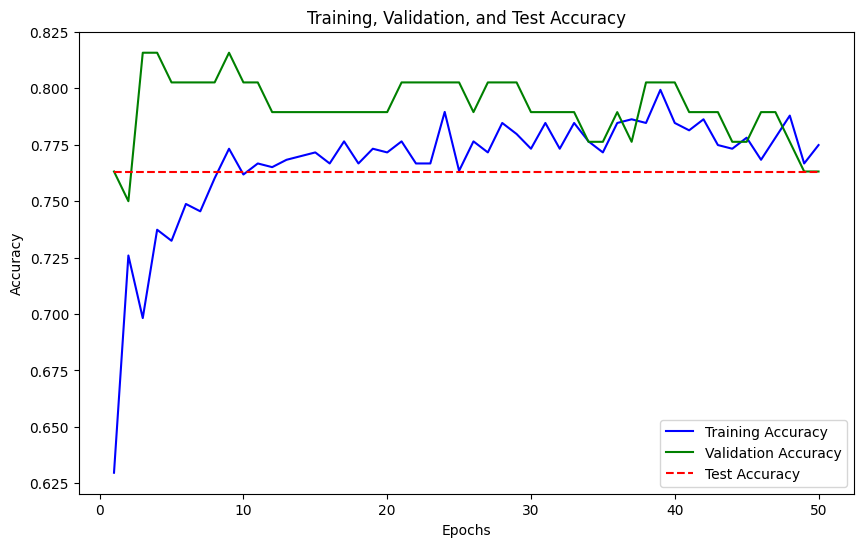

In [36]:
test_accuracy_repeated = [accuracy] * num_epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [37]:
# model5 hidden layer =3

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64) 
        self.relu = nn.ReLU()     
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc4 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):   
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)    
        x = self.relu(self.fc3(x)) 
        x = self.sigmoid(self.fc4(x)) 
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze() 
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()    

        predicted_train = torch.round(outputs) 
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval() 
test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  
test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6839 | Validation Loss: 0.6459 | Training Accuracy: 0.6166 | Validation Accuracy: 0.6842
Epoch 2/50 | Training Loss: 0.6489 | Validation Loss: 0.6013 | Training Accuracy: 0.6558 | Validation Accuracy: 0.6842
Epoch 3/50 | Training Loss: 0.5975 | Validation Loss: 0.5340 | Training Accuracy: 0.6688 | Validation Accuracy: 0.7500
Epoch 4/50 | Training Loss: 0.5592 | Validation Loss: 0.5097 | Training Accuracy: 0.6900 | Validation Accuracy: 0.8158
Epoch 5/50 | Training Loss: 0.5431 | Validation Loss: 0.5052 | Training Accuracy: 0.7520 | Validation Accuracy: 0.7632
Epoch 6/50 | Training Loss: 0.5279 | Validation Loss: 0.5035 | Training Accuracy: 0.7488 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.5167 | Validation Loss: 0.4954 | Training Accuracy: 0.7569 | Validation Accuracy: 0.7763
Epoch 8/50 | Training Loss: 0.5253 | Validation Loss: 0.5070 | Training Accuracy: 0.7341 | Validation Accuracy: 0.7632
Epoch 9/50 | Training Loss: 0.5152 | Validation 

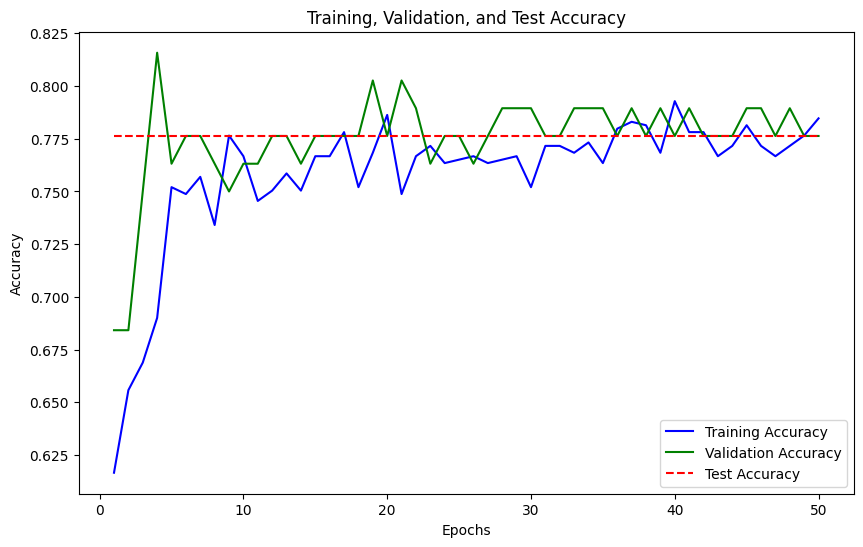

In [38]:
test_accuracy_repeated = [accuracy] * num_epochs 

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [39]:
# model6 hidden layer =4

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu = nn.ReLU()    
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc5 = nn.Linear(64, 1) 
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):    
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)    
        x = self.relu(self.fc3(x))
        x = self.dropout(x)    
        x = self.relu(self.fc4(x)) 
        x = self.sigmoid(self.fc5(x))
        return x

model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze() 
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad() 
        loss.backward()      
        optimizer.step()     

        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval() 
test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)
test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6744 | Validation Loss: 0.6524 | Training Accuracy: 0.6493 | Validation Accuracy: 0.6842
Epoch 2/50 | Training Loss: 0.6555 | Validation Loss: 0.6202 | Training Accuracy: 0.6525 | Validation Accuracy: 0.6842
Epoch 3/50 | Training Loss: 0.6364 | Validation Loss: 0.5693 | Training Accuracy: 0.6525 | Validation Accuracy: 0.6842
Epoch 4/50 | Training Loss: 0.5748 | Validation Loss: 0.5241 | Training Accuracy: 0.6754 | Validation Accuracy: 0.7500
Epoch 5/50 | Training Loss: 0.5394 | Validation Loss: 0.5094 | Training Accuracy: 0.7455 | Validation Accuracy: 0.7763
Epoch 6/50 | Training Loss: 0.5172 | Validation Loss: 0.5137 | Training Accuracy: 0.7537 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.5006 | Validation Loss: 0.5092 | Training Accuracy: 0.7684 | Validation Accuracy: 0.7632
Epoch 8/50 | Training Loss: 0.5106 | Validation Loss: 0.5063 | Training Accuracy: 0.7423 | Validation Accuracy: 0.7763
Epoch 9/50 | Training Loss: 0.4895 | Validation 

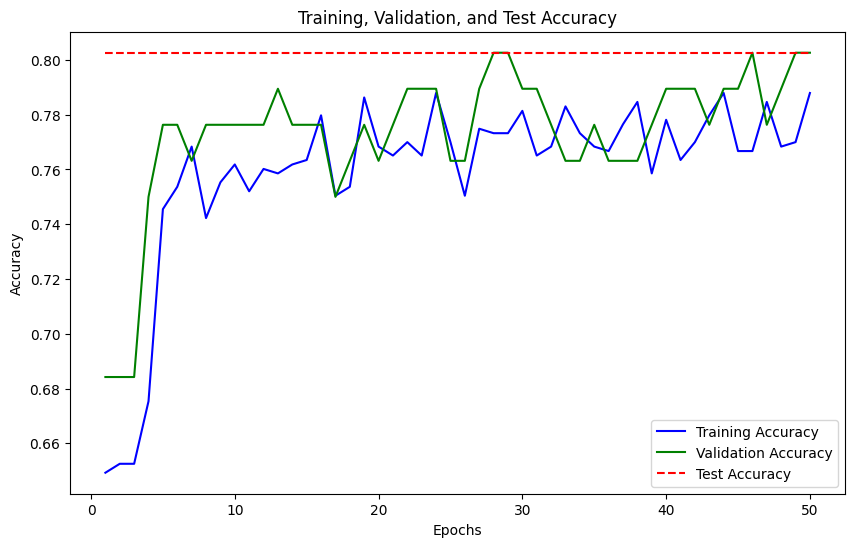

In [40]:
test_accuracy_repeated = [accuracy] * num_epochs  

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [41]:
# model 7 activation function: leaky ReLU

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1) 
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):     
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad() 
        loss.backward()     
        optimizer.step()  

        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval() 
test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs) 
test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6427 | Validation Loss: 0.5990 | Training Accuracy: 0.6933 | Validation Accuracy: 0.7632
Epoch 2/50 | Training Loss: 0.5751 | Validation Loss: 0.5309 | Training Accuracy: 0.7129 | Validation Accuracy: 0.8026
Epoch 3/50 | Training Loss: 0.5467 | Validation Loss: 0.5055 | Training Accuracy: 0.7488 | Validation Accuracy: 0.7895
Epoch 4/50 | Training Loss: 0.5108 | Validation Loss: 0.5167 | Training Accuracy: 0.7504 | Validation Accuracy: 0.7763
Epoch 5/50 | Training Loss: 0.4979 | Validation Loss: 0.5116 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4977 | Validation Loss: 0.5170 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 7/50 | Training Loss: 0.4829 | Validation Loss: 0.5180 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4841 | Validation Loss: 0.5132 | Training Accuracy: 0.7667 | Validation Accuracy: 0.7895
Epoch 9/50 | Training Loss: 0.4917 | Validation 

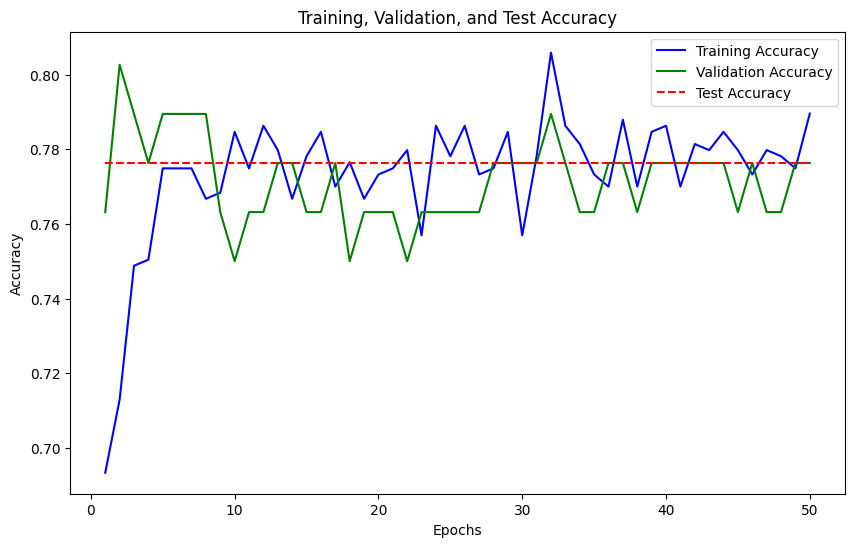

In [42]:
test_accuracy_repeated = [accuracy] * num_epochs 
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [43]:
# model 8 activation function: ELU

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.elu = nn.ELU()          
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):   
        x = self.elu(self.fc1(x))
        x = self.dropout(x)
        x = self.elu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()       
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")


    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval()  

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  

test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6329 | Validation Loss: 0.5484 | Training Accuracy: 0.6770 | Validation Accuracy: 0.8026
Epoch 2/50 | Training Loss: 0.5124 | Validation Loss: 0.4902 | Training Accuracy: 0.7537 | Validation Accuracy: 0.8026
Epoch 3/50 | Training Loss: 0.5024 | Validation Loss: 0.4848 | Training Accuracy: 0.7635 | Validation Accuracy: 0.8026
Epoch 4/50 | Training Loss: 0.4827 | Validation Loss: 0.4945 | Training Accuracy: 0.7781 | Validation Accuracy: 0.7895
Epoch 5/50 | Training Loss: 0.5055 | Validation Loss: 0.4936 | Training Accuracy: 0.7879 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4812 | Validation Loss: 0.4888 | Training Accuracy: 0.7830 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.4728 | Validation Loss: 0.4877 | Training Accuracy: 0.7586 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4994 | Validation Loss: 0.4867 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7763
Epoch 9/50 | Training Loss: 0.4657 | Validation 

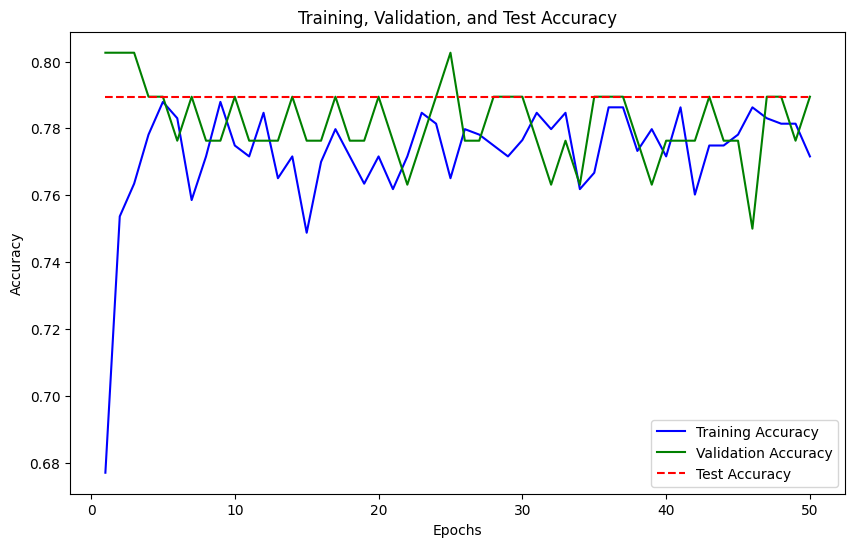

In [44]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [45]:
# model 9 activation function: SELU

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.selu = nn.SELU()       
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):     
        x = self.selu(self.fc1(x))
        x = self.dropout(x)
        x = self.selu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")


    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval()  

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)
test_loss = validation_losses[-1]
accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.5732 | Validation Loss: 0.4873 | Training Accuracy: 0.6966 | Validation Accuracy: 0.8026
Epoch 2/50 | Training Loss: 0.4897 | Validation Loss: 0.4708 | Training Accuracy: 0.7602 | Validation Accuracy: 0.7895
Epoch 3/50 | Training Loss: 0.4778 | Validation Loss: 0.4807 | Training Accuracy: 0.7635 | Validation Accuracy: 0.7763
Epoch 4/50 | Training Loss: 0.4928 | Validation Loss: 0.4927 | Training Accuracy: 0.7618 | Validation Accuracy: 0.7632
Epoch 5/50 | Training Loss: 0.4725 | Validation Loss: 0.5014 | Training Accuracy: 0.7700 | Validation Accuracy: 0.7763
Epoch 6/50 | Training Loss: 0.4838 | Validation Loss: 0.4997 | Training Accuracy: 0.7732 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.4786 | Validation Loss: 0.4918 | Training Accuracy: 0.7651 | Validation Accuracy: 0.7632
Epoch 8/50 | Training Loss: 0.4767 | Validation Loss: 0.4901 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7632
Epoch 9/50 | Training Loss: 0.4842 | Validation 

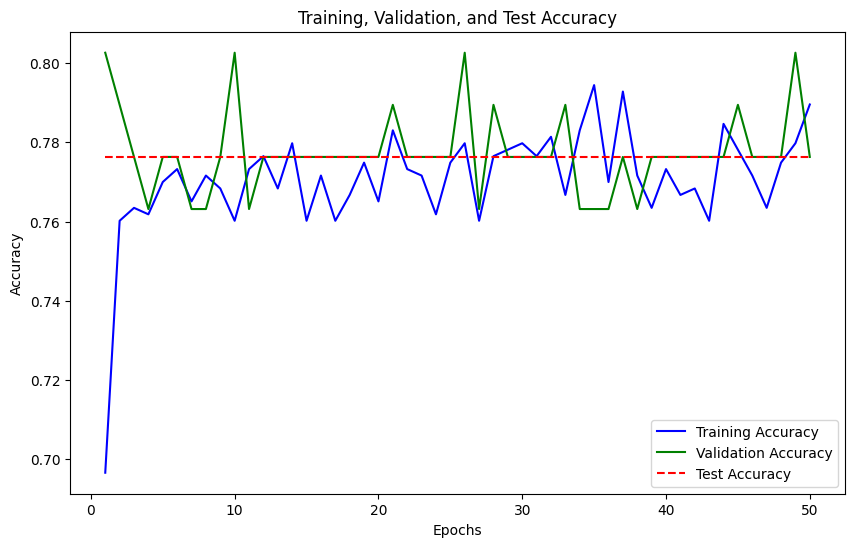

In [46]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [47]:
# BASE MODEL

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):      
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
test_losses = []

training_accuracies = []
validation_accuracies = []
test_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")


    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval()  

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  

test_loss = validation_losses[-1]

accuracy = accuracy_score(Y_val, test_outputs)

precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6727 | Validation Loss: 0.6323 | Training Accuracy: 0.6705 | Validation Accuracy: 0.7632
Epoch 2/50 | Training Loss: 0.6265 | Validation Loss: 0.5793 | Training Accuracy: 0.7096 | Validation Accuracy: 0.8026
Epoch 3/50 | Training Loss: 0.5866 | Validation Loss: 0.5393 | Training Accuracy: 0.7178 | Validation Accuracy: 0.8158
Epoch 4/50 | Training Loss: 0.5474 | Validation Loss: 0.5161 | Training Accuracy: 0.7374 | Validation Accuracy: 0.7763
Epoch 5/50 | Training Loss: 0.5175 | Validation Loss: 0.5071 | Training Accuracy: 0.7423 | Validation Accuracy: 0.8026
Epoch 6/50 | Training Loss: 0.4906 | Validation Loss: 0.5074 | Training Accuracy: 0.7684 | Validation Accuracy: 0.8026
Epoch 7/50 | Training Loss: 0.4841 | Validation Loss: 0.5126 | Training Accuracy: 0.7732 | Validation Accuracy: 0.7632
Epoch 8/50 | Training Loss: 0.4868 | Validation Loss: 0.5127 | Training Accuracy: 0.7781 | Validation Accuracy: 0.7763
Epoch 9/50 | Training Loss: 0.4924 | Validation 

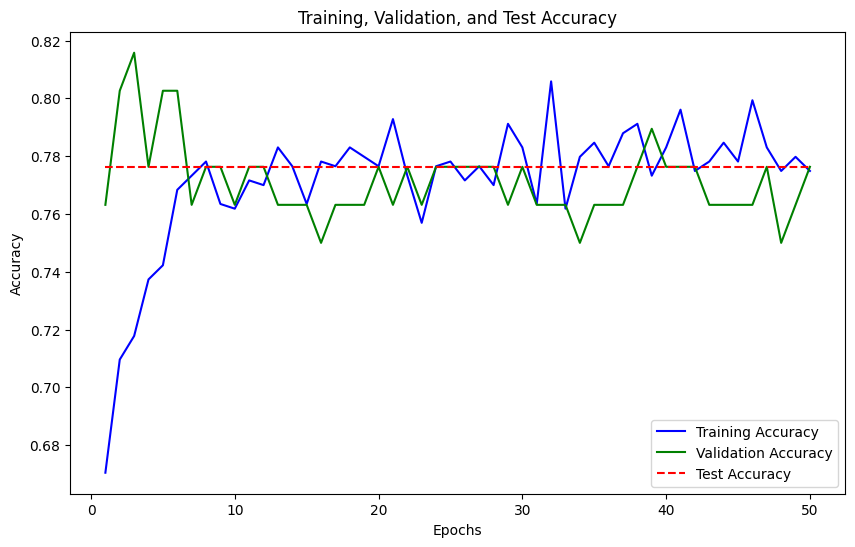

In [48]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [49]:
# BASE MODEL with early stopping
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):      
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
updated_epochs = 0
patience = 15

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

best_val_loss = float('inf')
start_time = time.time()
patience_counter = 0

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            updated_epochs = epoch + 1
            break

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")




model.eval()  

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  


accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')
earlyStopAccuracy = accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/50 | Training Loss: 0.6535 | Validation Loss: 0.6125 | Training Accuracy: 0.6493 | Validation Accuracy: 0.6842
Epoch 2/50 | Training Loss: 0.6000 | Validation Loss: 0.5663 | Training Accuracy: 0.6672 | Validation Accuracy: 0.7105
Epoch 3/50 | Training Loss: 0.5588 | Validation Loss: 0.5221 | Training Accuracy: 0.7194 | Validation Accuracy: 0.8026
Epoch 4/50 | Training Loss: 0.5339 | Validation Loss: 0.5033 | Training Accuracy: 0.7423 | Validation Accuracy: 0.7763
Epoch 5/50 | Training Loss: 0.5003 | Validation Loss: 0.4808 | Training Accuracy: 0.7504 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4732 | Validation Loss: 0.4813 | Training Accuracy: 0.7798 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.4699 | Validation Loss: 0.4811 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7763
Epoch 8/50 | Training Loss: 0.4934 | Validation Loss: 0.4904 | Training Accuracy: 0.7667 | Validation Accuracy: 0.7895
Epoch 9/50 | Training Loss: 0.4789 | Validation 

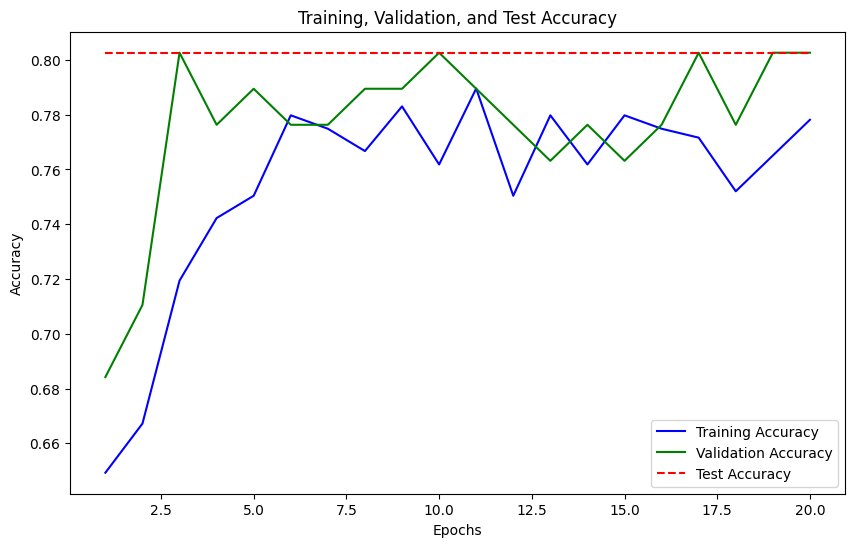

In [50]:
test_accuracy_repeated = [accuracy] * updated_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, updated_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, updated_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, updated_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [51]:
# BASE MODEL.  Learning rate schedular
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):      
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    
    scheduler.step(avg_val_loss)

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval()  

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  


accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')
LearningRateAccuracy = accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


/Users/jagritsharma/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 | Training Loss: 0.6506 | Validation Loss: 0.6123 | Training Accuracy: 0.6607 | Validation Accuracy: 0.6842
Epoch 2/50 | Training Loss: 0.5942 | Validation Loss: 0.5570 | Training Accuracy: 0.6852 | Validation Accuracy: 0.7500
Epoch 3/50 | Training Loss: 0.5610 | Validation Loss: 0.5184 | Training Accuracy: 0.7129 | Validation Accuracy: 0.8026
Epoch 4/50 | Training Loss: 0.5374 | Validation Loss: 0.5076 | Training Accuracy: 0.7569 | Validation Accuracy: 0.7895
Epoch 5/50 | Training Loss: 0.5054 | Validation Loss: 0.4967 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4816 | Validation Loss: 0.4989 | Training Accuracy: 0.7700 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.5064 | Validation Loss: 0.4920 | Training Accuracy: 0.7667 | Validation Accuracy: 0.7763
Epoch 8/50 | Training Loss: 0.4743 | Validation Loss: 0.4919 | Training Accuracy: 0.7830 | Validation Accuracy: 0.7632
Epoch 9/50 | Training Loss: 0.4828 | Validation 

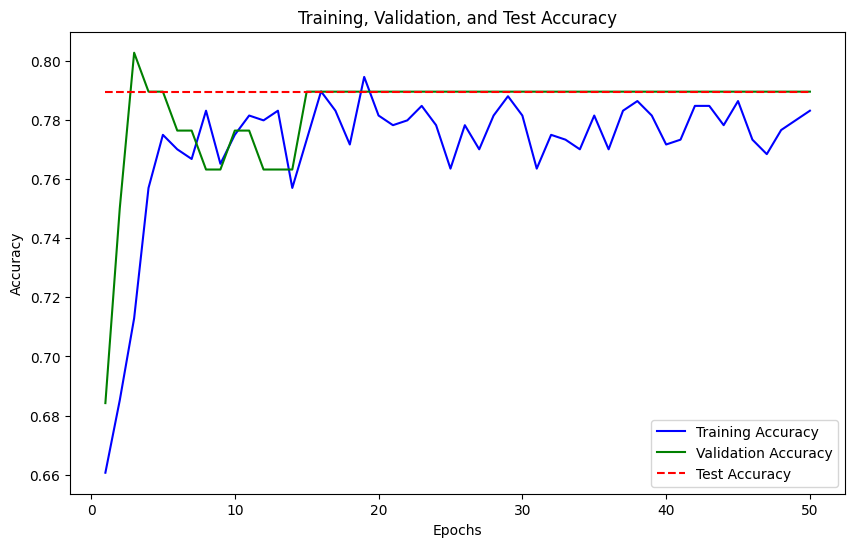

In [52]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [53]:
# BASE MODEL with Batch Normalization
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)      
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()            

        self.fc2 = nn.Linear(64, 64)     
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)   

        self.fc3 = nn.Linear(64, 1)      
        self.sigmoid = nn.Sigmoid()     

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.dropout(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    
    scheduler.step(avg_val_loss)

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")
model.eval()  

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  


accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')
BatchNormAccuracy = accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Epoch 1/50 | Training Loss: 0.6450 | Validation Loss: 0.6281 | Training Accuracy: 0.6215 | Validation Accuracy: 0.7105
Epoch 2/50 | Training Loss: 0.5524 | Validation Loss: 0.5559 | Training Accuracy: 0.7406 | Validation Accuracy: 0.7763
Epoch 3/50 | Training Loss: 0.5216 | Validation Loss: 0.5246 | Training Accuracy: 0.7357 | Validation Accuracy: 0.7763
Epoch 4/50 | Training Loss: 0.4950 | Validation Loss: 0.5036 | Training Accuracy: 0.7651 | Validation Accuracy: 0.7763


/Users/jagritsharma/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 5/50 | Training Loss: 0.4811 | Validation Loss: 0.5122 | Training Accuracy: 0.7700 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.4850 | Validation Loss: 0.5166 | Training Accuracy: 0.7569 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.4738 | Validation Loss: 0.5187 | Training Accuracy: 0.7732 | Validation Accuracy: 0.7763
Epoch 8/50 | Training Loss: 0.4695 | Validation Loss: 0.5173 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7763
Epoch 9/50 | Training Loss: 0.4817 | Validation Loss: 0.5209 | Training Accuracy: 0.7896 | Validation Accuracy: 0.7632
Epoch 10/50 | Training Loss: 0.4520 | Validation Loss: 0.5091 | Training Accuracy: 0.7928 | Validation Accuracy: 0.7763
Epoch 11/50 | Training Loss: 0.4738 | Validation Loss: 0.5047 | Training Accuracy: 0.7830 | Validation Accuracy: 0.7763
Epoch 12/50 | Training Loss: 0.4730 | Validation Loss: 0.5103 | Training Accuracy: 0.7700 | Validation Accuracy: 0.7895
Epoch 13/50 | Training Loss: 0.4601 | Validat

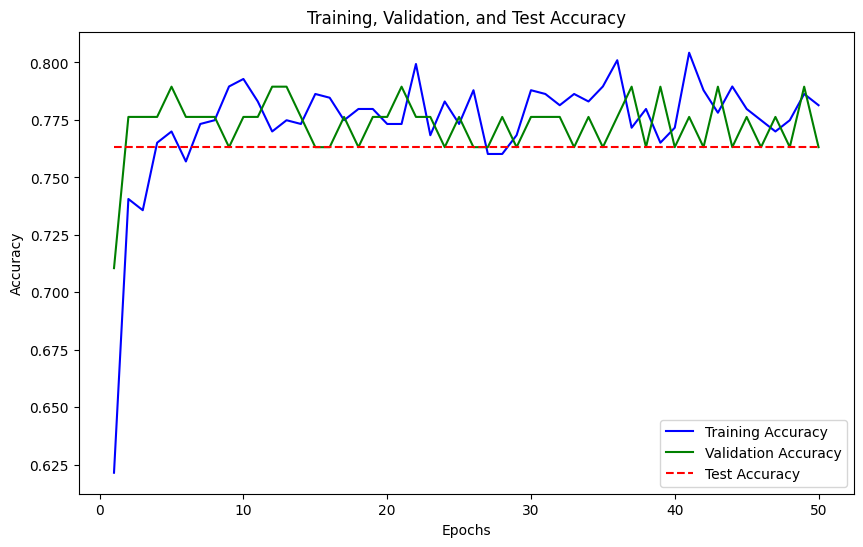

In [54]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


In [55]:
# BASE MODEL with K fold
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):  
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# K-Fold Cross Validation
k_folds = 5
num_epochs = 50
batch_size = 32
patience = 5

dataset = TensorDataset(X_train, Y_train)
kfold = KFold(n_splits=k_folds, shuffle=True)

fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []

for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):

    print(f'FOLD {fold+1}')
    print('--------------------------------')

    train_subsampler = SubsetRandomSampler(train_ids)
    val_subsampler = SubsetRandomSampler(val_ids)

    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_subsampler)
    val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_subsampler)

    
    model = SimpleNN()

    loss_function = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
    
        model.train()
        epoch_loss = 0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()  
            loss = loss_function(outputs, labels)
            epoch_loss += loss.item()

            
            optimizer.zero_grad()  
            loss.backward()        
            optimizer.step()      

           
            predicted_train = torch.round(outputs)  
            correct_train += (predicted_train == labels).sum().item()
            total_train += labels.size(0)

        avg_train_loss = epoch_loss / len(train_loader)
        training_losses.append(avg_train_loss)
        training_accuracies.append(correct_train / total_train) 

       
        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = model(val_inputs).squeeze()
                val_loss += loss_function(val_outputs, val_labels).item()

                predicted_val = torch.round(val_outputs)
                correct_val += (predicted_val == val_labels).sum().item()
                total_val += val_labels.size(0)

        avg_val_loss = val_loss / len(val_loader)
        validation_losses.append(avg_val_loss)
        validation_accuracies.append(correct_val / total_val) 

        print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
              f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    fold_train_losses.append(training_losses)
    fold_val_losses.append(validation_losses)
    fold_train_accuracies.append(training_accuracies)
    fold_val_accuracies.append(validation_accuracies)

    print(f'Finished fold {fold+1}')
KFoldAccuracy = np.mean(fold_val_accuracies)
# Average results across all folds
print(f'K-Fold Cross Validation Results for {k_folds} folds:')
print(f'Average Train Accuracy: {np.mean(fold_train_accuracies):.4f}')
print(f'Average Validation Accuracy: {np.mean(fold_val_accuracies):.4f}')


FOLD 1
--------------------------------
Epoch 1/50 | Training Loss: 0.6889 | Validation Loss: 0.6452 | Training Accuracy: 0.5755 | Validation Accuracy: 0.6829
Epoch 2/50 | Training Loss: 0.6431 | Validation Loss: 0.5899 | Training Accuracy: 0.6755 | Validation Accuracy: 0.6992
Epoch 3/50 | Training Loss: 0.6090 | Validation Loss: 0.5292 | Training Accuracy: 0.6857 | Validation Accuracy: 0.7317
Epoch 4/50 | Training Loss: 0.5598 | Validation Loss: 0.4799 | Training Accuracy: 0.7204 | Validation Accuracy: 0.7805
Epoch 5/50 | Training Loss: 0.5469 | Validation Loss: 0.4410 | Training Accuracy: 0.7306 | Validation Accuracy: 0.8130
Epoch 6/50 | Training Loss: 0.5119 | Validation Loss: 0.4210 | Training Accuracy: 0.7551 | Validation Accuracy: 0.8374
Epoch 7/50 | Training Loss: 0.5517 | Validation Loss: 0.4122 | Training Accuracy: 0.7429 | Validation Accuracy: 0.8374
Epoch 8/50 | Training Loss: 0.5114 | Validation Loss: 0.4104 | Training Accuracy: 0.7551 | Validation Accuracy: 0.8455
Epoch 9/

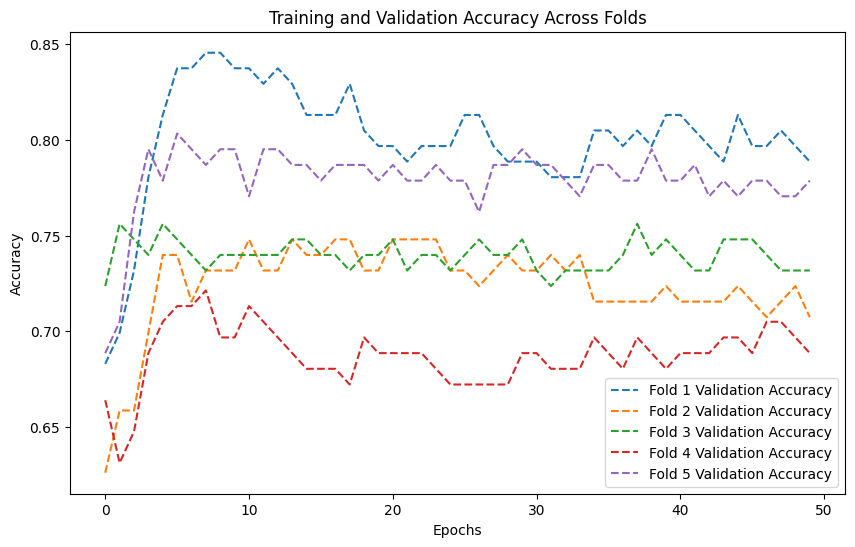

In [56]:
plt.figure(figsize=(10, 6))

for fold in range(k_folds):
    plt.plot(fold_val_accuracies[fold], label=f'Fold {fold+1} Validation Accuracy', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Across Folds')

plt.legend(loc='best')

plt.show()


In [57]:
print(earlyStopAccuracy)
print(LearningRateAccuracy)
print(BatchNormAccuracy)
print(KFoldAccuracy)

0.8026315789473685
0.7894736842105263
0.7631578947368421
0.7463201386112222


AFTER RUNNING MULTIPLE TIMES LEARNING RATE SCHEDEULER WAS SHOWING GOOD ACCURARCY CONSISTANTLY. HENCE WE CHOOSE LEARNING RATE SCHEDEULER AS OUR BEST MODEL.

In [58]:
# BASE MODEL.  Learning rate schedular
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(64, 64) 
        self.dropout = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(64, 1)  
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):      
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model = SimpleNN()

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

num_epochs = 50

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

best_val_loss = float('inf')
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()  
        loss = loss_function(outputs, labels)
        epoch_loss += loss.item()

        
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()      

       
        predicted_train = torch.round(outputs)  
        correct_train += (predicted_train == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    training_accuracies.append(correct_train / total_train) 

   
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels).item()

            predicted_val = torch.round(val_outputs)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val += val_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    validation_accuracies.append(correct_val / total_val) 

    print(f"Epoch {epoch+1}/{num_epochs} | Training Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f} | "
          f"Training Accuracy: {training_accuracies[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

    
    scheduler.step(avg_val_loss)

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds")

model.eval()  

with torch.no_grad():
    test_outputs = model(X_val)
    test_outputs = test_outputs.squeeze()
    test_outputs = torch.round(test_outputs)  


accuracy = accuracy_score(Y_val, test_outputs)
precision, recall, f1, _ = precision_recall_fscore_support(Y_val, test_outputs, average='binary')
LearningRateAccuracy = accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
torch.save(model.state_dict(), 'jagritsh_pgnanase_assignment2_part2.pt')


Epoch 1/50 | Training Loss: 0.6761 | Validation Loss: 0.6275 | Training Accuracy: 0.6052 | Validation Accuracy: 0.6842
Epoch 2/50 | Training Loss: 0.6300 | Validation Loss: 0.5701 | Training Accuracy: 0.6656 | Validation Accuracy: 0.7105
Epoch 3/50 | Training Loss: 0.5777 | Validation Loss: 0.5249 | Training Accuracy: 0.6884 | Validation Accuracy: 0.7763
Epoch 4/50 | Training Loss: 0.5497 | Validation Loss: 0.4943 | Training Accuracy: 0.7276 | Validation Accuracy: 0.8026
Epoch 5/50 | Training Loss: 0.5298 | Validation Loss: 0.4886 | Training Accuracy: 0.7488 | Validation Accuracy: 0.7895
Epoch 6/50 | Training Loss: 0.5008 | Validation Loss: 0.4850 | Training Accuracy: 0.7488 | Validation Accuracy: 0.7763
Epoch 7/50 | Training Loss: 0.4927 | Validation Loss: 0.4865 | Training Accuracy: 0.7749 | Validation Accuracy: 0.7895
Epoch 8/50 | Training Loss: 0.4809 | Validation Loss: 0.4866 | Training Accuracy: 0.7651 | Validation Accuracy: 0.7895
Epoch 9/50 | Training Loss: 0.4883 | Validation 

/Users/jagritsharma/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 19/50 | Training Loss: 0.4698 | Validation Loss: 0.4991 | Training Accuracy: 0.7830 | Validation Accuracy: 0.7895
Epoch 20/50 | Training Loss: 0.4987 | Validation Loss: 0.4996 | Training Accuracy: 0.7781 | Validation Accuracy: 0.7895
Epoch 21/50 | Training Loss: 0.4687 | Validation Loss: 0.5005 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7763
Epoch 22/50 | Training Loss: 0.4582 | Validation Loss: 0.5018 | Training Accuracy: 0.7814 | Validation Accuracy: 0.7763
Epoch 23/50 | Training Loss: 0.4793 | Validation Loss: 0.5013 | Training Accuracy: 0.7716 | Validation Accuracy: 0.7763
Epoch 24/50 | Training Loss: 0.4553 | Validation Loss: 0.5016 | Training Accuracy: 0.7961 | Validation Accuracy: 0.7763
Epoch 25/50 | Training Loss: 0.5194 | Validation Loss: 0.5013 | Training Accuracy: 0.7553 | Validation Accuracy: 0.7763
Epoch 26/50 | Training Loss: 0.4900 | Validation Loss: 0.5019 | Training Accuracy: 0.7537 | Validation Accuracy: 0.7763
Epoch 27/50 | Training Loss: 0.4882 | Va

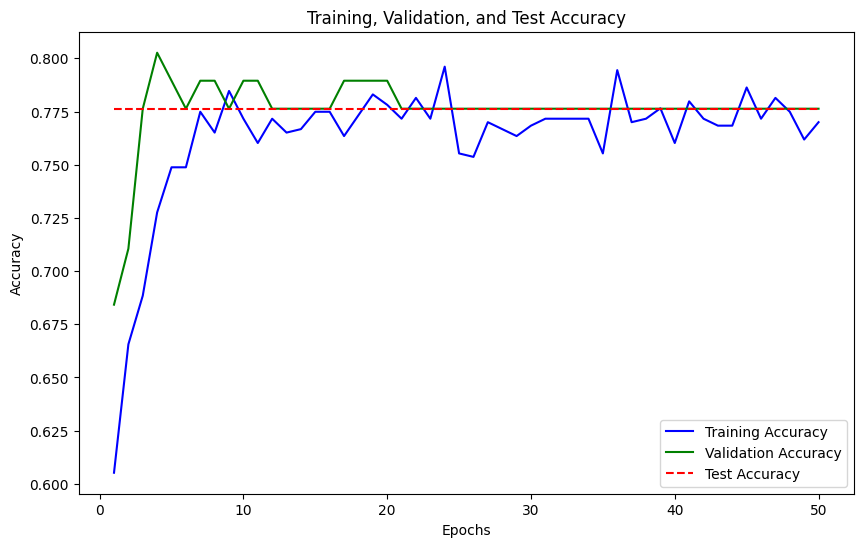

In [59]:
test_accuracy_repeated = [accuracy] * num_epochs  

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), test_accuracy_repeated, label='Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


<h2>References:</h2>
<ul>
    <li>Assignment 1</li>
    <li><a href="https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/">https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/</a></li>
    <li><a href="https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/">https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/</a></li>
    <li><a href="https://pytorch.org/docs/stable/tensors.html">https://pytorch.org/docs/stable/tensors.html</a></li>
    <li><a href="https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html">https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html</a></li>
    <li><a href="https://pytorch.org/docs/stable/nn.html">https://pytorch.org/docs/stable/nn.html</a></li>
    <li><a href="https://github.com/TylerYep/torchinfo">https://github.com/TylerYep/torchinfo</a></li>
    <li><a href="https://docs.python.org/3/library/time.html">https://docs.python.org/3/library/time.html</a></li>
    <li><a href="https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html">https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html</a></li>
    <li><a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc">https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc</a></li>
    <li><a href="https://pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html">https://pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</a></li>
    <li><a href="https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau">https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau</a></li>
    <li><a href="https://geeksforgeeks.org/batch-normalization-implementation-in-pytorch/">https://geeksforgeeks.org/batch-normalization-implementation-in-pytorch/</a></li>
</ul>